In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#create the dataframe for the breast cancer data set
#create column names because they are not in the data
column_names=[
    "class",
    "age",
    "menopause",
    "tumor_size",
    "inv_nodes",
    "node_caps",
    "deg_malig",
    "breast",
    "breast_quad",
    "irradiat"
]

df = pd.read_csv(
    r"C:\Users\sgear\Downloads\breast+cancer\breast-cancer.data",
    header=None,
    names=column_names
)

print("First five rows")
print(df.head())
print("Info")
print(df.info())
print("Columns")
print(df.columns)


First five rows
                  class    age menopause tumor_size inv_nodes node_caps  \
0  no-recurrence-events  30-39   premeno      30-34       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  40-49   premeno      20-24       0-2        no   
3  no-recurrence-events  60-69      ge40      15-19       0-2        no   
4  no-recurrence-events  40-49   premeno        0-4       0-2        no   

   deg_malig breast breast_quad irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no  
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 

Columns used for clustering: [6]


c:\Users\sgear\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\sgear\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\sgear\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\sgear\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly du

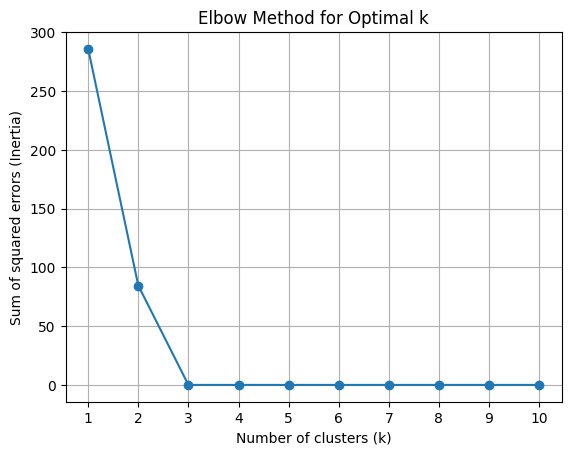

In [ ]:

#cluster tumor size and involved lymph nodes
# OPTION B (recommended for clarity): manually choose columns
# TODO: replace with the actual column names you want to use
# feature_cols = ["col1", "col2"]  # <- example
# X = df[feature_cols]

# For now, we'll use all numeric columns:
X = numeric_df

print("Columns used for clustering:", X.columns.tolist())

# -----------------------------
# 3. Scale / standardize the features
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 4. Compute SSE (inertia) for different k values
# -----------------------------
inertias = []
k_values = range(1, 11)  # k = 1 to 10 (you can adjust this)

for k in k_values:
    # n_init is explicitly set to avoid warnings and get stable results
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# -----------------------------
# 5. Plot the elbow curve
# -----------------------------
plt.figure()
plt.plot(k_values, inertias, marker='o')
plt.xticks(k_values)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of squared errors (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

# At this point:
#  - Look at the plot
#  - Decide where the "elbow" is (e.g., k=3 or k=4)
#  - Set optimal_k below to that va_
